<a href="https://colab.research.google.com/github/davidjcox333/Man-vs-Machine/blob/master/GME_fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Set path to data
from google.colab import drive
drive.mount('/content/gdrive')
%cd './gdrive/My Drive/GME & MLB/Data_and_Fits'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/GME & MLB/Data_and_Fits


In [3]:
# Packages we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import zipfile, io, os
import math
import time

# Fit GME for all pitchers for each season using RE288 as reinforcer. 

In [10]:
# Read in file
data_raw = pd.read_csv("ALL_GME_fits.csv")
data_raw = data_raw.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
data = data_raw.copy()
print("Number of Observations:", len(data), "\n")

Number of Observations: 1773 



In [11]:
data[::300]

,Player,Season,VAC_288,VAC_SO,Bias_288,Bias_SO,Sensitivity_288,Sensitivity_SO
0,Trevor Bauer,2016,0.3693,0.7268,0.2204,0.1272,0.3197,0.6549
300,Drew Storen,2019,0.4213,0.7206,-0.4068,-0.1492,0.1377,0.8691
600,Josh Fields,2019,0.3328,0.5867,0.2806,0.1028,0.1284,0.5914
900,Jacob deGrom,2019,0.3705,0.8423,0.0395,0.0077,0.3947,0.7859
1200,Nick Goody,2016,0.4475,0.7117,0.0287,-0.0066,0.2759,0.6361
1500,Chris Beck,2016,0.2390,0.6668,0.0902,0.0480,0.1700,0.5395


In [8]:
len(data['Player'].unique())

623

In [30]:
def season_swarmplot(y_val, palette_val, y_label):
  f, ax = plt.subplots(figsize=(12, 9))
  sns.swarmplot(x="Season", y=y_val, hue="Player", data=data, palette=palette_val)
  plt.xticks(fontsize=16)
  plt.ylim(0, 1)
  plt.yticks(fontsize=16)
  plt.xlabel("MLB Season", fontsize=24, labelpad=(16))
  plt.ylabel(y_label, fontsize=26, labelpad=(16))
  ax.get_legend().remove()
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.show()

NameError: ignored

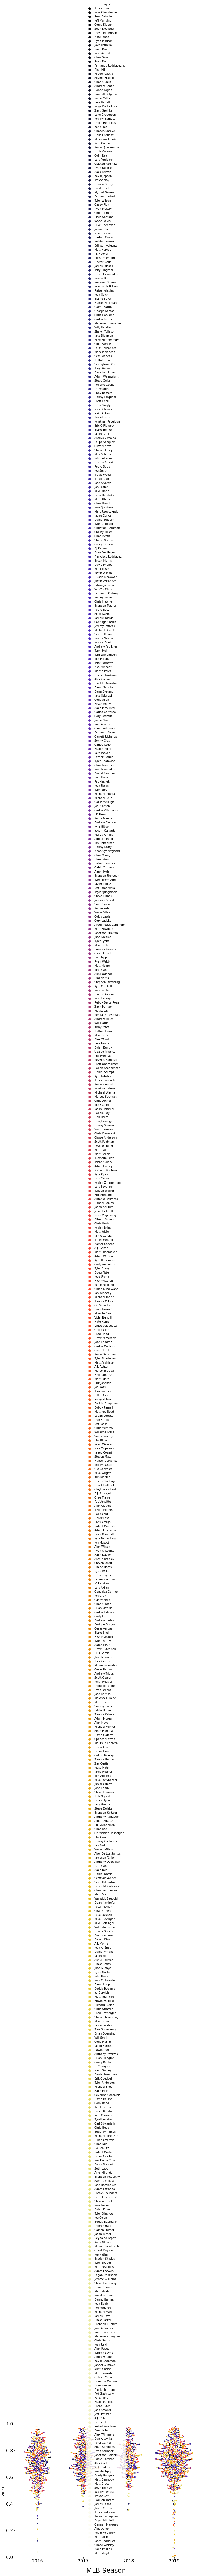

In [29]:
season_swarmplot(y_val='VAC_SO', palette_val='CMRmap', y_label='Variance Accounted for by GME')
season_swarmplot(y_val='Bias_SO', palette_val='CMRmap', y_label='Estimated Bias Parameter')
season_swarmplot(y_val='Sensitivity_SO', palette_val='CMRmap', y_label='Estimated Sensitivity Parameter')

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))
sns.swarmplot(x="Season", y="Bias_SO", hue="Player", data=data, palette='CMRmap')
plt.xticks(fontsize=16)
plt.ylim(0, 1)
plt.yticks(fontsize=16)
plt.xlabel("MLB Season", fontsize=24, labelpad=(16))
plt.ylabel('Variance Accounted for by GME', fontsize=26, labelpad=(16))
ax.get_legend().remove()
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Fill all NaNs for RE288_change col with 0s or rows where pitch description is unknown
data = data[data['description'].notna()]
data = data[data['pitch_name'].notna()]
data['RE288_change'] = data['RE288_change'].fillna(0)
data = data.reset_index()

In [ ]:
#uniq_p = uniq_p.tolist()
uniq_p.index('Edubray Ramos')

In [ ]:
data.game_date.min()

In [ ]:
uniq_p = uniq_p.tolist()

In [ ]:
# Create a list of all the unique pitchers in the df
uniq_p = data.player_name.unique()
uniq_p = uniq_p.tolist()
print(len(uniq_p))

In [ ]:
# Remove pitchers who have been troublesome
all_removed = ['Ryan Buchter', 'Tyson Ross', 'Ariel Pena', 'Dan Winkler', 'Andrew Heaney', \
                'Logan Kensing', 'Arnold Leon', 'Kyle Drabek', 'Chris Heston', \
                'Charlie Morton', 'John Danks', 'Robbie Erlin', 'Glen Perkins', \
                'Matt Buschmann', 'Tim Melville', 'Tyler Olson', 'David Hale', \
                'Tyler Wagner', 'Mike Broadway', 'Branden Pinder', 'Matt Marksberry', \
                'Erik Kratz', 'Damien Magnifico', 'Michael Kirkman', 'Daniel Webb', \
                'Vin Mazzaro', 'J.R. Graham', 'Scott Carroll', 'Josh Phegley', \
                'Layne Somsen', 'Kendry Flores', 'Alec Mills', 'Conor Mullee', \
                'Dustin Antolin', 'Tayron Guerrero', 'Chin-hui Tsao', 'Ruben Tejada', \
                'Ryan Merritt', 'Christian Bethancourt', 'Alexi Amarista', 'Cody Hall', \
                'Tyler Ladendorf', 'David Huff', 'JB Shuck', 'Tyler Danish', 'Al Alburquerque', \
                'Scott Diamond', 'Andrew Romine', 'Adrian Sampson', 'Jorge Rondon', \
                'Curtis Partch', 'Jonathan Aro', 'Gerardo Concepcion', 'Nick Tepesch', \
                'Donn Roach', 'Drew Butera', 'Yohan Flande', 'Chi Chi Gonzalez', \
                'Jo-Jo Reyes', 'Darwin Barney', 'Ryan Goins', 'Taylor Motter', \
                'Shawn Morimando', 'Miguel Montero', 'Chris Gimenez', 'Jayson Aquino', \
                'Dustin Molleken', 'Michael Roth', 'TJ House', 'Jared Hoying', \
                'Carlos Frias', 'Hyun-Jin Ryu', 'Kyle Lohse', 'Mike Mayers', \
                'Luis Sardinas', 'Roberto Hernandez', 'Eduardo Escobar', \
                'Joe Wieland', 'Jason Hursh', 'Brett Anderson', 'Tyler White', \
                'Ryan Flaherty', 'Adalberto Mejia', 'Parker Bridwell', 'Tyler Holt', \
                'Vicente Campos', 'Jake Esch', 'Kelvin Marte', 'Ben Rowen', \
                'Jose De Leon', 'Jake Buchanan', 'Ty Blach', 'Yohander Mendez', \
                'Jake Smith', 'David Paulino', 'Jason Vargas']
#uniq_p.remove(all_removed)
uniq_p = [i for i in uniq_p if i not in all_removed]
len(uniq_p)

In [ ]:
# Identify which pitches fall in which categories
hrd_strt = ['4-Seam Fastball', '2-Seam Fastball', 'Cutter']
hrd_brkng = ['Slider', 'Sinker', 'Split Finger', 'Screwball', 'Forkball']
sft_strt = ['Changeup', 'Knuckle Ball', 'Eephus']
sft_brkng = ['Curveball', 'Knuckle Curve']

In [ ]:
# Strike and out categories 
s_o = ['hit_into_play', 'foul','swinging_strike', 'swinging_strike_blocked', \
       'called_strike','foul_bunt', 'foul_tip', 'missed_bunt','swinging_pitchout', \
       'pitchout_hit_into_play_score','foul_pitchout', 'bunt_foul_tip']

In [ ]:
# Calculate GME for each pitcher in df using RE288 as outcome
# Make sure data types are as we need them
data.game_year = data.game_year.astype(int)

player = []
season = []
VAC_RE288 = []
bias_RE288 = []
sens_RE288 = []
VAC_strikes = []
bias_strikes = []
sens_strikes = []
player_errors = []

# Pull df for the target pitcher and break down by season
for i in uniq_p[700:800]: # out of 1359
  try:
    # Lists to store things in
    game_number = []
    year = []
    hard_straight_count = []
    hard_breaking_count = []
    soft_straight_count = []
    soft_breaking_count = []
    hard_straight_re288 = []
    hard_breaking_re288 = []
    soft_straight_re288 = []
    soft_breaking_re288 = []
    hard_straight_s_o = []
    hard_breaking_s_o = []
    soft_straight_s_o = []
    soft_breaking_s_o = []

    df = data[data['player_name']==i]  

    for j in [2016, 2017, 2018, 2019]:
      df_year = df[df['game_year']==j]
      g_uniq = df_year['game_date'].unique()
      if len(g_uniq) < 5:
        pass
      else:
        gnum = 1
        for k in g_uniq:
          game_data = df_year[df_year['game_date']==k]

          if len(game_data) < 5:
            pass
          else:
            # Create dfs for each pitch type
            hard_straight = game_data.loc[game_data.pitch_name.isin(hrd_strt)]
            hard_breaking = game_data.loc[game_data.pitch_name.isin(hrd_brkng)]
            soft_straight = game_data.loc[game_data.pitch_name.isin(sft_strt)]
            soft_breaking = game_data.loc[game_data.pitch_name.isin(sft_brkng)]
            
            # Get the count of each pitch type per game
            hstrt = len(hard_straight)
            hbrk = len(hard_breaking)
            sstrt = len(soft_straight)
            sbrk = len(soft_breaking)
            
            # Get the sum of RE288 by pitch type for each game
            hstrt288 = hard_straight.loc[hard_straight['RE288_change']>0]
            hbrk288  = hard_breaking.loc[hard_breaking['RE288_change']>0]
            sstrt288 = soft_straight.loc[soft_straight['RE288_change']>0]
            sbrk288  = soft_breaking.loc[soft_breaking['RE288_change']>0]
            hstrt288 = hstrt288['RE288_change'].sum()
            hbrk288  = hbrk288['RE288_change'].sum()      
            sstrt288 = sstrt288['RE288_change'].sum()
            sbrk288  = sbrk288['RE288_change'].sum()

            # Get the count of strikes/outs that followed each pitch type per game
            hstrt_strike = len(hard_straight.loc[hard_straight.description.isin(s_o)])
            hbrk_strike = len(hard_breaking.loc[hard_breaking.description.isin(s_o)])
            sstrt_strike = len(soft_straight.loc[soft_straight.description.isin(s_o)])
            sbrk_strike = len(soft_breaking.loc[soft_breaking.description.isin(s_o)])
            
            # Append the vals to the respective lists
            game_number.append(gnum)
            gnum += 1
            year.append(j)
            # Pitches
            hard_straight_count.append(hstrt)
            hard_breaking_count.append(hbrk)
            soft_straight_count.append(sstrt)
            soft_breaking_count.append(sbrk)
            # RE288
            hard_straight_re288.append(hstrt288)
            hard_breaking_re288.append(hbrk288)
            soft_straight_re288.append(sstrt288)
            soft_breaking_re288.append(sbrk288)
            # Strikes/outs
            hard_straight_s_o.append(hstrt_strike)
            hard_breaking_s_o.append(hbrk_strike)
            soft_straight_s_o.append(sstrt_strike)
            soft_breaking_s_o.append(sbrk_strike)
          
        # Log pitch and outcome ratios using fastball as Bi
        logged_bx = []
        logged_RE288 = []
        logged_strikes = []

        for l in list(range(len(hard_straight_count))):
          behavior = (hard_straight_count[l]+1)/(hard_breaking_count[l] + soft_straight_count[l] + soft_breaking_count[l]+1)
          RE288 = (hard_straight_re288[l]+.0001)/(hard_breaking_re288[l] + soft_straight_re288[l] + soft_breaking_re288[l]+.0001)
          strikes = (hard_straight_s_o[l]+1)/(hard_breaking_s_o[l] + soft_straight_s_o[l] + soft_breaking_s_o[l]+1)
          behavior = math.log(behavior, 10)
          RE288 = math.log(RE288, 10)
          strikes = math.log(strikes, 10)
          logged_bx.append(behavior)
          logged_RE288.append(RE288)
          logged_strikes.append(strikes)
      
      # Combine the lists and save df for the pitcher
      count_data = pd.DataFrame({'Year':year, 'Game': game_number, \
                                'HStrt': hard_straight_count, 'HBrk':hard_breaking_count, \
                                'SStrt':soft_straight_count,'SBrk':soft_breaking_count, \
                                'HStrtRE288':hard_straight_re288, 'HBrkRE288':hard_breaking_re288, \
                                'SStrtRE288':soft_straight_re288, 'SBrkRE288':soft_straight_re288, \
                                'HStrtStrike':hard_straight_s_o, 'HBrkStrike':hard_breaking_s_o, \
                                'SStrtStrike':soft_straight_s_o, 'SBrkStrike':soft_breaking_s_o, \
                                'Logged_Bx':logged_bx, 'Logged_RE288':logged_RE288, \
                                'Logged_Strikes':logged_strikes})
      count_data = count_data.fillna(0)

      # Save the player data
      count_data.to_csv('%s_counts.csv' %i)

      # Fit the GME and return the parameters
      s_288, b_288 = np.polyfit(count_data.Logged_RE288, count_data.Logged_Bx, 1)
      corrmat288 = np.corrcoef(count_data.Logged_RE288, count_data.Logged_Bx)
      r2_288 = (corrmat288[0,1])**2
      s_str, b_str = np.polyfit(count_data.Logged_Strikes, count_data.Logged_Bx, 1)
      corrmatSTR = np.corrcoef(count_data.Logged_Strikes, count_data.Logged_Bx)
      r2_str = (corrmatSTR[0,1])**2

      # Save the GME values
      player.append(i)
      season.append(j)
      VAC_RE288.append(round(r2_288, 4))
      VAC_strikes.append(round(r2_str, 4))
      bias_RE288.append(round(b_288, 4))
      sens_RE288.append(round(s_288, 4))
      bias_strikes.append(round(b_str, 4))
      sens_strikes.append(round(s_str, 4))

      # Plot RE288
      min_val = (count_data[['Logged_RE288', 'Logged_Bx']].min().min()) - .1
      max_val = (count_data[['Logged_RE288', 'Logged_Bx']].max().max()) + .1
      plt.figure(figsize=(8, 8))
      plt.plot(count_data.Logged_RE288, count_data.Logged_Bx, 'o', color='blue', alpha=0.5, label='RE288')
      plt.plot(count_data.Logged_RE288, s_288*count_data.Logged_RE288 + b_288, color='blue')
      plt.yticks(fontsize=14)
      plt.ylabel('log(Bi/Bo)', fontsize=24)
      plt.ylim(min_val, max_val)
      plt.xticks(fontsize=14)
      plt.xlabel('log(RE288-Bi/RE288-Bo)', fontsize=24)
      plt.xlim(min_val, max_val)
      plt.title('%s RE288' %i, fontsize=24)
      plt.text(min_val+0.05, max_val-0.05, 'bias=%s\nsensitivity=%s\nVAC=%s' %(round(b_288, 2), round(s_288, 2), round(r2_288, 2)), \
              fontsize=16, horizontalalignment='left', verticalalignment='top')
      plt.savefig('%s GME_288.jpg' %i)
      plt.show()

      # Plot Strikes
      min_val = (count_data[['Logged_Strikes', 'Logged_Bx']].min().min()) - .1
      max_val = (count_data[['Logged_Strikes', 'Logged_Bx']].max().max()) + .1
      plt.figure(figsize=(8, 8))
      plt.plot(count_data.Logged_Strikes, count_data.Logged_Bx, 'o', color='red', alpha=0.5, label='RE288')
      plt.plot(count_data.Logged_Strikes, s_str*count_data.Logged_Strikes + b_str, color='red')
      plt.yticks(fontsize=14)
      plt.ylabel('log(Bi/Bo)', fontsize=24)
      plt.ylim(min_val, max_val)
      plt.xticks(fontsize=14)
      plt.xlabel('log(Strikes-Bi/Strikes-Bo)', fontsize=24)
      plt.xlim(min_val, max_val)
      plt.title('%s Strikes/Outs' %i, fontsize=24)
      plt.text(min_val+0.05, max_val-0.05, 'bias=%s\nsensitivity=%s\nVAC=%s' %(round(b_str, 2), round(s_str, 2), round(r2_str, 2)), \
              fontsize=16, horizontalalignment='left', verticalalignment='top')
      plt.savefig('%s GME_SO.jpg' %i)
      plt.show()

    # Save the data
    player_fits = pd.DataFrame({'Player':player, 'Season':season, \
                                'VAC_288':VAC_RE288, 'VAC_SO':VAC_strikes, \
                                'Bias_288':bias_RE288, 'Bias_SO':bias_strikes, \
                                'Sensitivity_288':sens_RE288, 'Sensitivity_SO':sens_strikes})
    player_fits.to_csv('All_GME_Fits_08.csv')
  
  except Exception as ex:
    player_errors.append(i)
    print('Error with %s' %i)
    time.sleep(5)



# Plot histogram of GME params and fits

In [ ]:
# IF PICKING UP FRESH
player_fits = pd.read_csv('/content/gdrive/My Drive/Matching with RE288/Data_and_Fits/ALL_GME_fits.csv')
player_fits = player_fits.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
player_fits.head()

In [ ]:
# Read in data on starting pitchers
starters = pd.read_csv('/content/gdrive/My Drive/Matching with RE288/Data_and_Fits/Starting_Pitchers_16_19.csv')
starters.head()

In [ ]:
# Create dfs then lists of starters for each year
start_2016 = starters[starters['Year']==2016]
start_2017 = starters[starters['Year']==2017]
start_2018 = starters[starters['Year']==2018]
start_2019 = starters[starters['Year']==2019]

starters_16_list = pd.DataFrame(start_2016.Name.unique())
starters_17_list = pd.DataFRame(start_2017.Name.unique())
starters_18_list = start_2018.Name.unique()
starters_19_list = start_2019.Name.unique()

# Print lengths
print('2016:', len(starters_16_list), "\n", '2017:', len(starters_17_list), "\n", \
      '2018:', len(starters_18_list), "\n", '2019:', len(starters_19_list), "\n", )

In [ ]:
starters_16_list

In [ ]:
df_2016 = player_fits[player_fits['Season']==2016] # create 2016 df
df_16_st = df_2016[df_2016['Player'].isin(starters_16_list)] # isolate starters and pitchers

In [ ]:
# Plot Vacs by year for starters and relievers
df_2016 = player_fits[player_fits['Season']==2016] # create 2016 df
df_16_st = df_2016[df_2016['Player'].isin(starters_16_list[0])] # isolate starters and pitchers
df_16_re = df_2016[~df_2016['Player'].isin(starters_16_list[0])]

plt.figure(figsize=(12, 8))
plt.hist(df_16_st.VAC_288, color='blue', alpha=0.8, bins=100, label='RE288-SR+; Starters')
plt.hist(df_16_st.VAC_SO, color='red', alpha=0.8, bins=100, label='Strikes-SR+; Starters')
plt.hist(df_16_re.VAC_288, color='darkviolet', alpha=0.8, bins=100, label='RE288-SR+; Relievers')
plt.hist(df_16_re.VAC_SO, color='gold', alpha=0.8, bins=100, label='Strikes-SR+; Relievers')
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of Pitchers', fontsize=24)
plt.xticks(fontsize=16)
plt.xlabel('VAC by GME', fontsize=24)
#plt.savefig('pop_VAC_hist_2.jpg')
plt.show()

In [ ]:
player_fits = player_fits.drop_duplicates(subset=['Player', 'VAC_288', 'VAC_SO', \
                                                    'Bias_288', 'Bias_SO', \
                                                    'Sensitivity_288', 'Sensitivity_SO'], \
                                          keep='last')
player_fits.to_csv('ALL_GME_fits.csv')

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(player_fits.VAC_288, color='blue', alpha=0.8, bins=100, label='RE288 Change as SR+')
plt.hist(player_fits.VAC_SO, color='red', alpha=0.8, bins=100, label='Strikes/Outs as SR+')
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of Pitchers', fontsize=24)
plt.xticks(fontsize=16)
plt.xlabel('VAC by GME', fontsize=24)
plt.savefig('pop_VAC_hist_2.jpg')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(player_fits.Bias_288, color='blue', alpha=0.8, bins=100, label='RE288 Change as SR+')
plt.hist(player_fits.Bias_SO, color='red', alpha=0.8, bins=100, label='Strikes/Outs as SR+')
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of Pitchers', fontsize=24)
plt.ylim(0, )
plt.xticks(fontsize=16)
plt.xlabel('Estimated Bias', fontsize=24)
plt.savefig('pop_bias_hist_2.jpg')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(player_fits.Sensitivity_288, color='blue', alpha=0.8, bins=100, label='RE288 Change as SR+')
plt.hist(player_fits.Sensitivity_SO, color='red', alpha=0.8, bins=100, label='Strikes/Outs as SR+')
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of Pitchers', fontsize=24)
plt.xticks(fontsize=16)
plt.xlabel('Estimated Sensitivity', fontsize=24)
plt.savefig('pop_Sensitivity_hist_2.jpg')
plt.show()

In [ ]:
# Fit GME for all pitchers for each season using RE288 as reinforcer. 

# Read in file
data_raw = pd.read_csv("All_MLB_data_for_GME.csv")
data_raw = data_raw.drop(['Unnamed: 0'], axis=1)
data = data_raw.copy()
data.head()

# Fill all NaNs for RE288_change col with 0s or rows where pitch description is unknown
data = data[data['description'].notna()]
data = data[data['pitch_name'].notna()]
data['RE288_change'] = data['RE288_change'].fillna(0)
data = data.reset_index()

#uniq_p = uniq_p.tolist()
uniq_p.index('Edubray Ramos')

data.game_date.min()

uniq_p = uniq_p.tolist()

# Create a list of all the unique pitchers in the df
uniq_p = data.player_name.unique()
uniq_p = uniq_p.tolist()
print(len(uniq_p))

# Remove pitchers who have been troublesome
all_removed = ['Ryan Buchter', 'Tyson Ross', 'Ariel Pena', 'Dan Winkler', 'Andrew Heaney', \
                'Logan Kensing', 'Arnold Leon', 'Kyle Drabek', 'Chris Heston', \
                'Charlie Morton', 'John Danks', 'Robbie Erlin', 'Glen Perkins', \
                'Matt Buschmann', 'Tim Melville', 'Tyler Olson', 'David Hale', \
                'Tyler Wagner', 'Mike Broadway', 'Branden Pinder', 'Matt Marksberry', \
                'Erik Kratz', 'Damien Magnifico', 'Michael Kirkman', 'Daniel Webb', \
                'Vin Mazzaro', 'J.R. Graham', 'Scott Carroll', 'Josh Phegley', \
                'Layne Somsen', 'Kendry Flores', 'Alec Mills', 'Conor Mullee', \
                'Dustin Antolin', 'Tayron Guerrero', 'Chin-hui Tsao', 'Ruben Tejada', \
                'Ryan Merritt', 'Christian Bethancourt', 'Alexi Amarista', 'Cody Hall', \
                'Tyler Ladendorf', 'David Huff', 'JB Shuck', 'Tyler Danish', 'Al Alburquerque', \
                'Scott Diamond', 'Andrew Romine', 'Adrian Sampson', 'Jorge Rondon', \
                'Curtis Partch', 'Jonathan Aro', 'Gerardo Concepcion', 'Nick Tepesch', \
                'Donn Roach', 'Drew Butera', 'Yohan Flande', 'Chi Chi Gonzalez', \
                'Jo-Jo Reyes', 'Darwin Barney', 'Ryan Goins', 'Taylor Motter', \
                'Shawn Morimando', 'Miguel Montero', 'Chris Gimenez', 'Jayson Aquino', \
                'Dustin Molleken', 'Michael Roth', 'TJ House', 'Jared Hoying', \
                'Carlos Frias', 'Hyun-Jin Ryu', 'Kyle Lohse', 'Mike Mayers', \
                'Luis Sardinas', 'Roberto Hernandez', 'Eduardo Escobar', \
                'Joe Wieland', 'Jason Hursh', 'Brett Anderson', 'Tyler White', \
                'Ryan Flaherty', 'Adalberto Mejia', 'Parker Bridwell', 'Tyler Holt', \
                'Vicente Campos', 'Jake Esch', 'Kelvin Marte', 'Ben Rowen', \
                'Jose De Leon', 'Jake Buchanan', 'Ty Blach', 'Yohander Mendez', \
                'Jake Smith', 'David Paulino', 'Jason Vargas']
#uniq_p.remove(all_removed)
uniq_p = [i for i in uniq_p if i not in all_removed]
len(uniq_p)

# Identify which pitches fall in which categories
hrd_strt = ['4-Seam Fastball', '2-Seam Fastball', 'Cutter']
hrd_brkng = ['Slider', 'Sinker', 'Split Finger', 'Screwball', 'Forkball']
sft_strt = ['Changeup', 'Knuckle Ball', 'Eephus']
sft_brkng = ['Curveball', 'Knuckle Curve']

# Strike and out categories 
s_o = ['hit_into_play', 'foul','swinging_strike', 'swinging_strike_blocked', \
       'called_strike','foul_bunt', 'foul_tip', 'missed_bunt','swinging_pitchout', \
       'pitchout_hit_into_play_score','foul_pitchout', 'bunt_foul_tip']

# Calculate GME for each pitcher in df using RE288 as outcome
# Make sure data types are as we need them
data.game_year = data.game_year.astype(int)

player = []
season = []
VAC_RE288 = []
bias_RE288 = []
sens_RE288 = []
VAC_strikes = []
bias_strikes = []
sens_strikes = []
player_errors = []

# Pull df for the target pitcher and break down by season
for i in uniq_p[700:800]: # out of 1359
  try:
    # Lists to store things in
    game_number = []
    year = []
    hard_straight_count = []
    hard_breaking_count = []
    soft_straight_count = []
    soft_breaking_count = []
    hard_straight_re288 = []
    hard_breaking_re288 = []
    soft_straight_re288 = []
    soft_breaking_re288 = []
    hard_straight_s_o = []
    hard_breaking_s_o = []
    soft_straight_s_o = []
    soft_breaking_s_o = []

    df = data[data['player_name']==i]  

    for j in [2016, 2017, 2018, 2019]:
      df_year = df[df['game_year']==j]
      g_uniq = df_year['game_date'].unique()
      if len(g_uniq) < 5:
        pass
      else:
        gnum = 1
        for k in g_uniq:
          game_data = df_year[df_year['game_date']==k]

          if len(game_data) < 5:
            pass
          else:
            # Create dfs for each pitch type
            hard_straight = game_data.loc[game_data.pitch_name.isin(hrd_strt)]
            hard_breaking = game_data.loc[game_data.pitch_name.isin(hrd_brkng)]
            soft_straight = game_data.loc[game_data.pitch_name.isin(sft_strt)]
            soft_breaking = game_data.loc[game_data.pitch_name.isin(sft_brkng)]
            
            # Get the count of each pitch type per game
            hstrt = len(hard_straight)
            hbrk = len(hard_breaking)
            sstrt = len(soft_straight)
            sbrk = len(soft_breaking)
            
            # Get the sum of RE288 by pitch type for each game
            hstrt288 = hard_straight.loc[hard_straight['RE288_change']>0]
            hbrk288  = hard_breaking.loc[hard_breaking['RE288_change']>0]
            sstrt288 = soft_straight.loc[soft_straight['RE288_change']>0]
            sbrk288  = soft_breaking.loc[soft_breaking['RE288_change']>0]
            hstrt288 = hstrt288['RE288_change'].sum()
            hbrk288  = hbrk288['RE288_change'].sum()      
            sstrt288 = sstrt288['RE288_change'].sum()
            sbrk288  = sbrk288['RE288_change'].sum()

            # Get the count of strikes/outs that followed each pitch type per game
            hstrt_strike = len(hard_straight.loc[hard_straight.description.isin(s_o)])
            hbrk_strike = len(hard_breaking.loc[hard_breaking.description.isin(s_o)])
            sstrt_strike = len(soft_straight.loc[soft_straight.description.isin(s_o)])
            sbrk_strike = len(soft_breaking.loc[soft_breaking.description.isin(s_o)])
            
            # Append the vals to the respective lists
            game_number.append(gnum)
            gnum += 1
            year.append(j)
            # Pitches
            hard_straight_count.append(hstrt)
            hard_breaking_count.append(hbrk)
            soft_straight_count.append(sstrt)
            soft_breaking_count.append(sbrk)
            # RE288
            hard_straight_re288.append(hstrt288)
            hard_breaking_re288.append(hbrk288)
            soft_straight_re288.append(sstrt288)
            soft_breaking_re288.append(sbrk288)
            # Strikes/outs
            hard_straight_s_o.append(hstrt_strike)
            hard_breaking_s_o.append(hbrk_strike)
            soft_straight_s_o.append(sstrt_strike)
            soft_breaking_s_o.append(sbrk_strike)
          
        # Log pitch and outcome ratios using fastball as Bi
        logged_bx = []
        logged_RE288 = []
        logged_strikes = []

        for l in list(range(len(hard_straight_count))):
          behavior = (hard_straight_count[l]+1)/(hard_breaking_count[l] + soft_straight_count[l] + soft_breaking_count[l]+1)
          RE288 = (hard_straight_re288[l]+.0001)/(hard_breaking_re288[l] + soft_straight_re288[l] + soft_breaking_re288[l]+.0001)
          strikes = (hard_straight_s_o[l]+1)/(hard_breaking_s_o[l] + soft_straight_s_o[l] + soft_breaking_s_o[l]+1)
          behavior = math.log(behavior, 10)
          RE288 = math.log(RE288, 10)
          strikes = math.log(strikes, 10)
          logged_bx.append(behavior)
          logged_RE288.append(RE288)
          logged_strikes.append(strikes)
      
      # Combine the lists and save df for the pitcher
      count_data = pd.DataFrame({'Year':year, 'Game': game_number, \
                                'HStrt': hard_straight_count, 'HBrk':hard_breaking_count, \
                                'SStrt':soft_straight_count,'SBrk':soft_breaking_count, \
                                'HStrtRE288':hard_straight_re288, 'HBrkRE288':hard_breaking_re288, \
                                'SStrtRE288':soft_straight_re288, 'SBrkRE288':soft_straight_re288, \
                                'HStrtStrike':hard_straight_s_o, 'HBrkStrike':hard_breaking_s_o, \
                                'SStrtStrike':soft_straight_s_o, 'SBrkStrike':soft_breaking_s_o, \
                                'Logged_Bx':logged_bx, 'Logged_RE288':logged_RE288, \
                                'Logged_Strikes':logged_strikes})
      count_data = count_data.fillna(0)

      # Save the player data
      count_data.to_csv('%s_counts.csv' %i)

      # Fit the GME and return the parameters
      s_288, b_288 = np.polyfit(count_data.Logged_RE288, count_data.Logged_Bx, 1)
      corrmat288 = np.corrcoef(count_data.Logged_RE288, count_data.Logged_Bx)
      r2_288 = (corrmat288[0,1])**2
      s_str, b_str = np.polyfit(count_data.Logged_Strikes, count_data.Logged_Bx, 1)
      corrmatSTR = np.corrcoef(count_data.Logged_Strikes, count_data.Logged_Bx)
      r2_str = (corrmatSTR[0,1])**2

      # Save the GME values
      player.append(i)
      season.append(j)
      VAC_RE288.append(round(r2_288, 4))
      VAC_strikes.append(round(r2_str, 4))
      bias_RE288.append(round(b_288, 4))
      sens_RE288.append(round(s_288, 4))
      bias_strikes.append(round(b_str, 4))
      sens_strikes.append(round(s_str, 4))

      # Plot RE288
      min_val = (count_data[['Logged_RE288', 'Logged_Bx']].min().min()) - .1
      max_val = (count_data[['Logged_RE288', 'Logged_Bx']].max().max()) + .1
      plt.figure(figsize=(8, 8))
      plt.plot(count_data.Logged_RE288, count_data.Logged_Bx, 'o', color='blue', alpha=0.5, label='RE288')
      plt.plot(count_data.Logged_RE288, s_288*count_data.Logged_RE288 + b_288, color='blue')
      plt.yticks(fontsize=14)
      plt.ylabel('log(Bi/Bo)', fontsize=24)
      plt.ylim(min_val, max_val)
      plt.xticks(fontsize=14)
      plt.xlabel('log(RE288-Bi/RE288-Bo)', fontsize=24)
      plt.xlim(min_val, max_val)
      plt.title('%s RE288' %i, fontsize=24)
      plt.text(min_val+0.05, max_val-0.05, 'bias=%s\nsensitivity=%s\nVAC=%s' %(round(b_288, 2), round(s_288, 2), round(r2_288, 2)), \
              fontsize=16, horizontalalignment='left', verticalalignment='top')
      plt.savefig('%s GME_288.jpg' %i)
      plt.show()

      # Plot Strikes
      min_val = (count_data[['Logged_Strikes', 'Logged_Bx']].min().min()) - .1
      max_val = (count_data[['Logged_Strikes', 'Logged_Bx']].max().max()) + .1
      plt.figure(figsize=(8, 8))
      plt.plot(count_data.Logged_Strikes, count_data.Logged_Bx, 'o', color='red', alpha=0.5, label='RE288')
      plt.plot(count_data.Logged_Strikes, s_str*count_data.Logged_Strikes + b_str, color='red')
      plt.yticks(fontsize=14)
      plt.ylabel('log(Bi/Bo)', fontsize=24)
      plt.ylim(min_val, max_val)
      plt.xticks(fontsize=14)
      plt.xlabel('log(Strikes-Bi/Strikes-Bo)', fontsize=24)
      plt.xlim(min_val, max_val)
      plt.title('%s Strikes/Outs' %i, fontsize=24)
      plt.text(min_val+0.05, max_val-0.05, 'bias=%s\nsensitivity=%s\nVAC=%s' %(round(b_str, 2), round(s_str, 2), round(r2_str, 2)), \
              fontsize=16, horizontalalignment='left', verticalalignment='top')
      plt.savefig('%s GME_SO.jpg' %i)
      plt.show()

    # Save the data
    player_fits = pd.DataFrame({'Player':player, 'Season':season, \
                                'VAC_288':VAC_RE288, 'VAC_SO':VAC_strikes, \
                                'Bias_288':bias_RE288, 'Bias_SO':bias_strikes, \
                                'Sensitivity_288':sens_RE288, 'Sensitivity_SO':sens_strikes})
    player_fits.to_csv('All_GME_Fits_08.csv')
  
  except Exception as ex:
    player_errors.append(i)
    print('Error with %s' %i)
    time.sleep(5)

